**Ta naloga se ocenjuje in je ne smete izpustiti.**

Za vsako oceno je potrebno narediti tudi vse, kar je zahtevano za nižje ocene.


Imamo množico konveksnih večkotnikov. Na primer takšno:

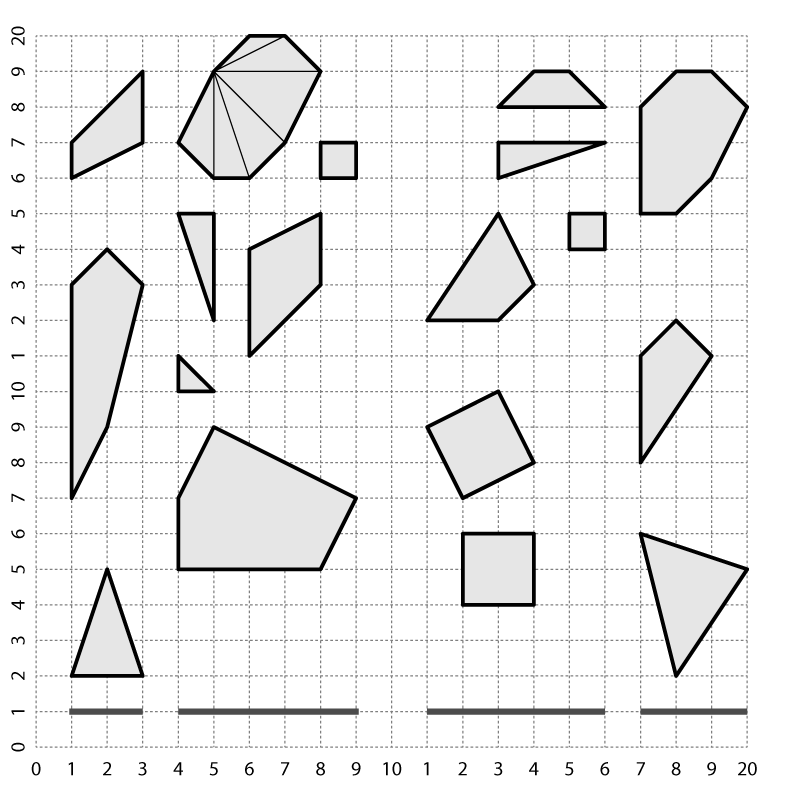

Like predstavimo s seznamom seznamov koordinat (terk).

```python
liki = [
    [(1, 2), (3, 2), (2, 5)],
    [(1, 7), (2, 9), (3, 13), (2, 14), (1, 13)],
    [(1, 16), (1, 17), (3, 19), (3, 17)],
    [(4, 5), (4, 7), (5, 9), (9, 7), (8, 5)],
    [(4, 10), (5, 10), (4, 11)],
    [(6, 14), (6, 11), (8, 13), (8, 15)],
    [(9, 17), (9, 16), (8, 16), (8, 17)],
    [(5, 19), (4, 17), (5, 16), (6, 16), (7, 17), (8, 19), (7, 20), (6, 20)],
    [(12, 6), (12, 4), (14, 4), (14, 6)],
    [(11, 9), (12, 7), (14, 8), (13, 10)],
    [(14, 13), (13, 15), (11, 12), (13, 12)],
    [(15, 14), (16, 14), (16, 15), (15, 15)],
    [(13, 17), (13, 16), (16, 16)],
    [(13, 18), (16, 18), (15, 19), (14, 19)],
    [(18, 2), (20, 5), (17, 6)],
    [(17, 8), (19, 11), (18, 12), (17, 11)],
    [(17, 15), (18, 15), (19, 16), (20, 18), (19, 19), (18, 19), (17, 18)]
]
```

Koordinate oglišč niso nujno cela števila.

Lik začnemo opisovati s poljubnim ogliščem; oglišča naštejemo, kot si sledijo v smeri enaki ali nasprotni smeri urinega kazalca.

## Za oceno 6

- Napiši funkcijo `najvec(liki)`, ki prejme takšen seznam in vrne najpogostejše število oglišč. Za gornji primer vrne 4, ker je največ štirikotnikov. Če je enako pogostih več, naj vrne manjše število; če bi bilo trikotnikov toliko kot štirikotnikov, bi vrnil 3, ne 4.

- Napiši funkcijo `ploscina3(trikotnik)`, ki prejme oglišča trikotnika (na primer `[(1, 2), (3, 2), (2, 5)]`) in vrne njegovo ploščino. ([Pomoč](https://math.stackexchange.com/questions/516219/finding-out-the-area-of-a-triangle-if-the-coordinates-of-the-three-vertices-are).)

- Napiši funkcijo `ploscina(lik)`, ki prejme oglišča poljubnega konveksnega večkotnika in vrne njegovo ploščino. Ploščino konveksnega večkotnika lahko izračunamo tako, da si izberemo poljubno točko in seštejemo ploščine vseh trikotnikov, ki vsebujejo to točko in par sosednjih oglišč. Idejo kaže razrezani lik levo zgoraj. (Če koga zanima, si lahko ogleda, [kako gre to v splošnem](https://en.wikipedia.org/wiki/Shoelace_formula)).

- Napiši funkcijo `skupna_ploscina(liki)`, ki prejme seznam likov (npr. vseh likov na gornjhi sliki) in vrne njihovo skupno ploščino. Liki se ne prekrivajo (oz. se ti s tem ni potrebno ukvarjati).

### Rešitev

Prvo funkcijo se lepo počasi napiše tako, da najprej sestavimo slovar, v katerega štejemo, koliko n-kotnikov imamo; ključ je število kotov, pripadajoča vrednost pove, koliko takšnih imamo. Potem pa z novo zanko prehodimo slovar in vrnemo ključ, ki mu je prirejena največja vrednost.

In [1]:
def najvec(liki):
    stevci = defaultdict(int)
    for lik in liki:
        stevci[len(lik)] += 1

    naj = None
    for oglisc, stevilo in sorted(stevci.items()):
        if stevilo > stevci[naj]:
            naj = oglisc
    return naj

Izračunati ploščino trikotnika je trivialno. To funkcijo ste morali v bistvu zapisati zato, da je bil ta del v ločeni - in ločeno testirani funkciji - tako da bi se morebitne napake v formuli pokazale že tu in ne šele v naslednji, bolj zapleteni funkciji.

Vseeno je nekoliko poučno, kako tule razpakiramo argument.

In [2]:
def ploscina3(oglisca):
    (x0, y0), (x1, y1), (x2, y2) = oglisca
    return abs(((x1 - x0) * (y2 - y0) - (x2 - x0) * (y1 - y0)) / 2)

Ploščino poligona zdaj izračunamo tako, da seštevamo ploščine trikotnikov med prvo točko in pari zaporednih točk.

In [3]:
def ploscina(lik):
    p = 0
    for t1, t2 in zip(lik[1:], lik[2:]):
        p += ploscina3((lik[0], t1, t2))
    return p

Seveda gre tule tudi v eni vrstici, s `sum`, a zdaj pustimo.

Skupna ploščina je pač vsota vseh ploščin.

In [4]:
def skupna_ploscina(liki):
    p = 0
    for lik in liki:
        p += ploscina(lik)
    return p

Vsaj tole pa napišimo še krajše. Kogar zanima, naj pogleda funkcijo `map`, da bo razumel, kako tole deluje.

In [5]:
def skupna_ploscina(liki):
    return sum(map(ploscina, liki))

## Za oceno 7

- Napiši funkcijo `zapisi(ime_datoteke, liki)`, ki prejme ime datoteke in seznam likov. Funkcija v datoteko `ime_datoteke` zapiše koordinate vseh oglišč likov v enakem vrstnem redu, v katerem so podani v seznamih, s tem da prvo oglišče ponovi, ko se lik konča. Klic

    ```python
    zapisi("foo.txt",
        [[(1, 1), (2, 2), (5, 0)],
         [(10, 4), (11, 4), (12, 5), (12, 8), (12, 4)]])
    ```

    v datoteko z imenom `foo.txt` zapiše

    ```
    1 1
    2 2
    5 0
    1 1
    10 4
    11 4
    12 5
    12 8
    12 4
    10 4
    ```

    Da je lika konec torej povemo s ponovljenim ogliščem (v gornjem primeru `1 1` in `10 4`).
    Za potrebe te naloge smeš predpostaviti, da so koordinate cela števila.

    Pazi na morebitne odvečne presledke. Edini presledek je med koordinatama!

- Napiši funkcijo `preberi(ime_datoteke)`, ki prejme ime datoteke z liki, shranjenimi v gornji obliki. Funkcija vrne seznam likov, kot smo ga vajeni iz prejšnjih funkcij.

### Rešitev

Domačo nalogo ste dobili, preden smo se učili oblikovanja nizov. Funkcijo `zapisi` bi zato napisali tako:

In [6]:
def zapisi(ime_datoteke, liki):
    dat = open(ime_datoteke, "w")
    for lik in liki:
        for x, y in lik + lik[:1]:
            dat.write(str(x) + " " + str(y) + "\n")

`lik` + `lik[:1]`?! Takole: prvo točko moramo ponoviti. Za to bi lahko za zanko dodali še en `dat.write`. Lahko pa jo kar prištejemo k seznamu. Upam, da ste se najprej zmotili in napisali `lik + lik[0]`; to na konec seznama `lik` doda vsebino seznama `lik[0]`. Če je `lik` enak `[(1, 2), (3, 4), (5, 6)]` je `lik + [lik[0]]` enak `[(1, 2), (3, 4), (5, 6), 1, 2]`. Pravilno je `lik + [lik[0]]` - na konec seznama `lik` moramo pripeti seznam, ki vsebuje prvi element `lik`. Ali pa tako kot piše zgoraj: `lik + lik[:1]`, se je tudi `lik[:1]` ravno seznam s prvo točko `lik`.

Če funkcijo pisali po predavanjih, na katerih smo spoznali oblikovanje nizov, ste zadnjo vrstico, upam, zapisali krajše.

In [7]:
def zapisi(ime_datoteke, liki):
    dat = open(ime_datoteke, "w")
    for lik in liki:
        for x, y in lik + lik[:1]:
            dat.write(f"{x} {y}\n")

Branje je mogoče sprogramirati na kup načinov. Ena izmed študentk je naredila nekaj v tem slogu.

In [8]:
def preberi(ime_datoteke):
    tocke = []
    for vrstica in open(ime_datoteke):
        x, y = vrstica.split()
        tocke.append((int(x), int(y)))

    liki = []
    while tocke:
        for i in range(1, len(tocke)):
            if tocke[i] == tocke[0]:
                break
        liki.append(tocke[:i])
        del tocke[:i + 1]
    return liki

V prvem delu preberemo koordinate vseh točk. Tu ni posebne znanosti, le na oklepaje v klicu `append` bodite pozorni. Imamo oklepaje za klic funkcije, sledi pa še en par oklepajev, ker dodajamo terko.

Bolj zabaven je drugi del. Najprej poglejmo notranjo zanko, `for`. Ta poišče točko, ki je enaka prvi. (To bi lahko naredili še na kup drugih načinov; lahko bi uporabili zanko `while`, ali, z nekaj previdnosti, celo `tocke.index`.) Najdevši jo, doda v `liki` seznam vseh točk do ponovljene, `i`-te in iz `tocke` pobriše vse točke do, vključno, `i`-te. To ponavlja, dokler ne zmanjka točk.

V tretjem letniku boste izvedeli, da je ta funkcija počasna (seveda se ta počasnost začne poznati šele, ko je točk res veliko) zaradi brisanja. Boljše je sprogramirati tako, da si zapomnimo, do kje smo že prišli. Takole:

In [9]:
def preberi(ime_datoteke):
    tocke = []
    for vrstica in open(ime_datoteke):
        x, y = vrstica.split()
        tocke.append((int(x), int(y)))

    liki = []
    zacetek = 0
    while zacetek != len(tocke):
        for konec in range(zacetek + 1, len(tocke)):
            if tocke[konec] == tocke[zacetek]:
                break
        liki.append(tocke[zacetek:konec])
        zacetek = konec + 1
    return liki

Rešitev je torej podobna kot prej, le da imamo namesto `0` zacetek. Pa brisanja, seveda ni več.

Namesto 

```python
        x, y = vrstica.split()
        tocke.append((int(x), int(y)))
```

lahko pišemo tudi

```python
        tocke.append(tuple(int(x) for x in vrstica.split())
```

To deluje za poljubnodimenzionalne točke, pa še ... kaj pa vem, niti ni krajše, samo "resni" programerji morda raje delamo tako.

Zdaj pa še rešitev v slogu tega, kar bomo počeli v nalogi za oceno 8: namesto da bi najprej prebrali vse točke, jih kar sproti zlagamo v lik.

In [10]:
def preberi(ime_datoteke):
    liki = []
    prva = None
    for vrstica in open(ime_datoteke):
        tocka = tuple(float(x) for x in vrstica.split())
        if prva == None:
            prva = tocka
            liki.append([tocka])
        elif tocka == prva:
            prva = None
        else:
            liki[-1].append(tocka)
    return liki

Tu spremenljivka `prva` hrani prvo točko.

- Če je enaka `None`, začenjamo novi lik; zapomnimo si prvo točko, na katero naletimo in v `liki` dodamo nov seznam, ki vsebuje tole točko.
- Če je trenutna točka enaka prvi, je lik zaključen; v `liki` ne dodajamo ničesar, samo `prva` postavimo na `None`, da se ve, da bomo v naslednji vrstici datoteke začeli nov lik.
- Sicer pa je trenutna točka pač nova točka v liku. Dodamo jo v lik, ki ga trenutno sestavaljamo, torej zadnji lik (`lik[-1]`), se pravi `lik[-1].append(tocka)`.

## Za oceno 8

- Napiši funkcijo `ploscina_dat(ime_datoteke)`, ki prejme datoteko z opisi likov in vrne seznam, ki vsebuje njihovo skupno ploščino.

    To bi bilo očitno trivialno:

    ```python
    def ploscina_dat(ime_datoteke):
        return skupna_ploscina(preberi(ime_datoteke))
    ```

    Zato se mora funkcija držati omejitve: funkcija ne sme sestaviti nobenega seznama -- niti posredno, tako da kliče `preberi`, ki sestavi takšen seznam. Z drugimi besedami, funkcija mora lepo brati vozlišča in jih premetavati po spremenljivkah ter seštevati ploščine trikotnikov. (Če želiš, smeš sestaviti seznam, ki je dolg največ tri elemente.)

    Upoštevaj, da imajo večkotniki lahko poljubno število vozlišč - lahko naletite tudi na stokotnik.

    **Pazi:** testi te omejitve ne preverjajo. Sam(a) skrbi zanjo.
    
### Rešitev

Imeli bomo spremenljivke `prva`, `druga` in `tretja`, ki bodo predstavljale tri točke.

Funkcija teče podobno kot zadnja funkcija za branje datoteke.
- Če je trenutna točka enaka prvi, je lik končan; `prva`, `druga` in `tretja` postavimo na `None`.
- Če je trenutna točka enaka `None`, začenjamo nov `lik`: točko si zapomnimo kot prvo.
- Če trenutna točka ni `None`, druga pa je `None`, si trenutno točko zapomnimo kot drugo.
- Sicer pa:

    - Če je tretja točka `None`, je trenutna točka tretja.
    - Sicer pa smo prej že imeli tri točke in smo zdaj naleteli na četrto (ali peto ali šesto ...). Tisto, kar je bila prej `tretja` točka je zdaj druga, trenutno pa si zapomnimo kot tretjo.
    
    Nato pa, v vsakem primeru, povečamo ploščino.

In [11]:
def ploscina_dat(ime_datoteke):
    prva = druga = tretja = None
    ploscina = 0
    for vrstica in open(ime_datoteke):
        tocka = [float(x) for x in vrstica.split()]
        if prva == tocka:
            prva = druga = tretja = None
        elif prva == None:
            prva = tocka
        elif druga == None:
            druga = tocka
        else:
            if tretja == None:
                tretja = tocka
            else:
                druga, tretja = tretja, tocka
            ploscina += ploscina3((prva, druga, tretja))
    return ploscina

Funkcija je malenkost krajša, če imamo namesto spremenljivk `prva`, `druga` in `tretja` kar seznam. Nove točke dodajamo tako, da vzamemo prvo točko (če obstaja), zadnjo (če obstaja) in novo.

In [12]:
def ploscina_dat(ime_datoteke):
    trikotnik = []
    ploscina = 0
    for vrstica in open(ime_datoteke):
        tocka = [float(x) for x in vrstica.split()]
        if trikotnik and trikotnik[0] == tocka:
            trikotnik = []
        else:
            trikotnik = trikotnik[:1] + trikotnik[-1:] + [tocka]
            if len(trikotnik) == 3:
                ploscina += ploscina3(trikotnik)
    return ploscina

Kdor bo pozorno prebral, bo opazil, da sta `trikotnik[:1]` in `trikotnik[-1:]` lahko ena in ista točka. Ta funkcija upošteva tudi trikotnik, ki dvakrat vsebuje prvo točko lika in nato drugo. S tem ne bo sitnosti, saj je njegova ploščina tako ali tako 0.

## Za oceno 9

Oceno 9 bo dobil, kdor bo lepo sprogramiral vse do ocene 8.

## Za oceno 10

Med sestavljanjem domače naloge dežuje. Če bi sijalo sonce in bi bila ura točno poldan in bi stali točno na ekvatorju, pa bi liki metali sence. Narisane so na dnu slike.

- Napiši funkcijo `dolzina_senc(liki)`, ki vrne skupno dolžino senc.

Funkcija ni zelo težka, če se je pametno lotite. Vzemite jo kot uganko. Če se zatakne, napišite mail. Meni, ne svojemu prijatelju, ki študira na FRI ali FMF. :)


### Rešitev

Najprej gremo čez like in poberemo le koordinate `x`. Nato sestavimo seznam, ki vsebuje le najmanjši in največji `x` za vsak lik ter ga uredimo. Tako dobimo seznam intervalov, ki predstavljajo začetek in konec sence vsakega lika.

Sledi združevanje senc. Gremo čez sence in za vsako pogledamo, ali se začne še preden se je končala senca. Če je tako, zamenjamo to senco z novo senco. Začetek nove sence je tam kot prej, konec pa je tam, kjer je bolj desni konec od teh dve senc. Lahko se namreč zgodi, da se druga senca nadaljuje čez prejšnjo ali pa se konča že pred njo - torej tako, da je druga popolnoma vsebovana v prvi.

Ko so sence združene, če seštejemo njihove dolžine.

In [13]:
def dolzina_senc(liki):
    xs = [[x for x, _ in lik] for lik in liki]
    sence = sorted([min(x), max(x)] for x in xs)

    i = 1
    while i < len(sence):
        if sence[i][0] < sence[i - 1][1]:
            sence[i - 1][1] = max(sence[i][1], sence[i - 1][1])
            del sence[i]
        else:
            i += 1
    
    return sum(y - x for x, y in sence)